In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Caminho do shapefile
shp_path = r"..\..\Data\Processed\PT-FireSprd_v3.0\L2_FireBehavior\PT-FireSprd_v3.0_L2_model.shp"

# Carregar shapefile
gdf = gpd.read_file(shp_path)
print(f"Número de linhas: {len(gdf)}")
print(f"Colunas: {list(gdf.columns)}")

Número de linhas: 851
Colunas: ['ros_p', 'duration_p', 'elev_av', 'aspect_sin', 'aspect_cos', 'landform', 'land_use', '1_3y_fir_p', '3_8y_fir_p', '8_ny_fir_p', 'fuel_age', 'fuel_model', 'f_load_av', 'sW_1m_av', 'sW_3m_av', 'sW_7_av', 'sW_28_av', 'sW_100_av', 'sW_289_av', 't_2m_C_av', 'd_2m_C_av', 'rh_2m_av', 'VPD_Pa_av', 'sP_hPa_av', 'gp_m2s2_av', 'dfmc_av', 'HDW_av', 'Haines_av', 'FWI_12h_av', 'DC_12h_av', 'FFMC_12h_a', 'wv10_kh_av', 'wsin10_av', 'wcos10_av', 'wv100_k_av', 'wsin100_av', 'wcos100_av', 'Recirc', 'CircVar', 't_950_av', 't_850_av', 't_700_av', 't_500_av', 't_300_av', 'rh_950_av', 'rh_850_av', 'rh_700_av', 'rh_500_av', 'rh_300_av', 'wv_950_av', 'wv_850_av', 'wv_700_av', 'wv_500_av', 'wv_300_av', 'wsi_950_av', 'wco_950_av', 'wsi_850_av', 'wco_850_av', 'wsi_700_av', 'wco_700_av', 'wsi_500_av', 'wco_500_av', 'wsi_300_av', 'wco_300_av', 'vwv_950_av', 'vwv_850_av', 'vwv_700_av', 'vwv_500_av', 'vwv_300_av', 'gp_950_av', 'gp_850_av', 'gp_700_av', 'gp_500_av', 'gp_300_av', 'gT_s_9

In [3]:
# Remover colunas desnecessárias
drop_cols = ['inidoy', 'enddoy', 'ros_p_lg1', 'duration_p', 'f_start', 'geometry']
gdf = gdf.drop(columns=[c for c in drop_cols if c in gdf.columns])

# Converter variáveis categóricas
categorical_vars = ["fuel_model", "landform", "land_use"]
for col in categorical_vars:
    if col in gdf.columns:
        gdf[col] = gdf[col].astype(str).astype("category")

print("Colunas categóricas convertidas:")
print(categorical_vars)

Colunas categóricas convertidas:
['fuel_model', 'landform', 'land_use']


In [4]:
# Selecionar colunas numéricas para PCA
numeric_cols = gdf.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'ros_p' in numeric_cols:
    numeric_cols.remove('ros_p')  # ros_p NÃO entra no PCA

print("=== Colunas numéricas usadas no PCA ===")
print(numeric_cols)

# Preencher NaN com 0
X = gdf[numeric_cols].fillna(0)

# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

=== Colunas numéricas usadas no PCA ===
['elev_av', 'aspect_sin', 'aspect_cos', '1_3y_fir_p', '3_8y_fir_p', '8_ny_fir_p', 'fuel_age', 'f_load_av', 'sW_1m_av', 'sW_3m_av', 'sW_7_av', 'sW_28_av', 'sW_100_av', 'sW_289_av', 't_2m_C_av', 'd_2m_C_av', 'rh_2m_av', 'VPD_Pa_av', 'sP_hPa_av', 'gp_m2s2_av', 'dfmc_av', 'HDW_av', 'Haines_av', 'FWI_12h_av', 'DC_12h_av', 'FFMC_12h_a', 'wv10_kh_av', 'wsin10_av', 'wcos10_av', 'wv100_k_av', 'wsin100_av', 'wcos100_av', 'Recirc', 'CircVar', 't_950_av', 't_850_av', 't_700_av', 't_500_av', 't_300_av', 'rh_950_av', 'rh_850_av', 'rh_700_av', 'rh_500_av', 'rh_300_av', 'wv_950_av', 'wv_850_av', 'wv_700_av', 'wv_500_av', 'wv_300_av', 'wsi_950_av', 'wco_950_av', 'wsi_850_av', 'wco_850_av', 'wsi_700_av', 'wco_700_av', 'wsi_500_av', 'wco_500_av', 'wsi_300_av', 'wco_300_av', 'vwv_950_av', 'vwv_850_av', 'vwv_700_av', 'vwv_500_av', 'vwv_300_av', 'gp_950_av', 'gp_850_av', 'gp_700_av', 'gp_500_av', 'gp_300_av', 'gT_s_9_av', 'gT_9_8_av', 'gT_8_7_av', 'gT_7_5_av', 'gT_5_3

In [5]:
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print("\n=== Variância explicada pelos PCs ===")
for i, v in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {v:.3f}")

loadings = pd.DataFrame(
    pca.components_.T,
    index=numeric_cols,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

print("\n=== TOP 20 variáveis por componente (|loading|) ===")
for pc in loadings.columns:
    print(f"\n{pc} – Top 20 variáveis (|loading|):")
    top20_pc = loadings[pc].abs().sort_values(ascending=False).head(20)
    for var in top20_pc.index:
        print(f"  {var:<30s} {loadings.loc[var, pc]: .3f}")



=== Variância explicada pelos PCs ===
PC1: 0.151
PC2: 0.129
PC3: 0.086

=== TOP 20 variáveis por componente (|loading|) ===

PC1 – Top 20 variáveis (|loading|):
  wv_950_av                       0.195
  wv100_k_av                      0.192
  wco_700_av                      0.190
  wco_500_av                      0.184
  wSv_1_av                        0.178
  sP_hPa_av                       0.176
  LiftIdx_av                      0.172
  gp_m2s2_av                     -0.171
  wcos10_av                       0.169
  wSv_7_av                       -0.166
  wv10_kh_av                      0.165
  wcos100_av                      0.164
  wco_300_av                      0.164
  wco_850_av                      0.162
  vwv_950_av                     -0.161
  wco_950_av                      0.160
  CCL_hPa_av                     -0.158
  sW_28_av                       -0.151
  elev_av                        -0.149
  sW_7_av                        -0.148

PC2 – Top 20 variáveis (|loading|):
 

In [6]:
# Contribuição total nos PCs
loadings['total_abs'] = loadings.abs().sum(axis=1)
print("\n=== TOP 20 variáveis (contribuição total nos 3 PCs) ===")
print(loadings['total_abs'].sort_values(ascending=False).head(20))

# Variáveis fracas (|loading| < 0.2 em todos os PCs)
weak_vars = loadings.drop(columns='total_abs')[(loadings.drop(columns='total_abs').abs() < 0.2).all(axis=1)]
print("\n=== Variáveis que não se encaixam em nenhum PC (|loading| < 0.2) ===")
print(weak_vars.index.tolist())


=== TOP 20 variáveis (contribuição total nos 3 PCs) ===
t_950_av      0.397471
t_850_av      0.397064
t_2m_C_av     0.381592
sW_3m_av      0.375261
sW_289_av     0.373862
wv_700_av     0.365477
sW_1m_av      0.361984
wco_500_av    0.360938
gp_700_av     0.358436
sW_100_av     0.357982
wSv_7_av      0.353030
LCL_hPa_av    0.351584
wv_950_av     0.350946
sP_hPa_av     0.346509
VentIdx_av    0.344999
gp_m2s2_av    0.339027
sW_28_av      0.333497
gp_500_av     0.333116
VPD_Pa_av     0.325865
gT_7_5_av     0.323653
Name: total_abs, dtype: float64

=== Variáveis que não se encaixam em nenhum PC (|loading| < 0.2) ===
['elev_av', 'aspect_sin', 'aspect_cos', '1_3y_fir_p', '3_8y_fir_p', '8_ny_fir_p', 'fuel_age', 'f_load_av', 'sW_7_av', 'sW_28_av', 'd_2m_C_av', 'sP_hPa_av', 'gp_m2s2_av', 'HDW_av', 'Haines_av', 'FWI_12h_av', 'DC_12h_av', 'FFMC_12h_a', 'wv10_kh_av', 'wsin10_av', 'wcos10_av', 'wv100_k_av', 'wsin100_av', 'wcos100_av', 'Recirc', 'CircVar', 't_850_av', 't_700_av', 't_500_av', 't_300_a

In [7]:
gdf['ln_ros_p1'] = np.log1p(gdf['ros_p'])

for i in range(n_components):
    gdf[f'PC{i+1}'] = X_pca[:, i]

print("PCs adicionados ao GeoDataFrame")

PCs adicionados ao GeoDataFrame


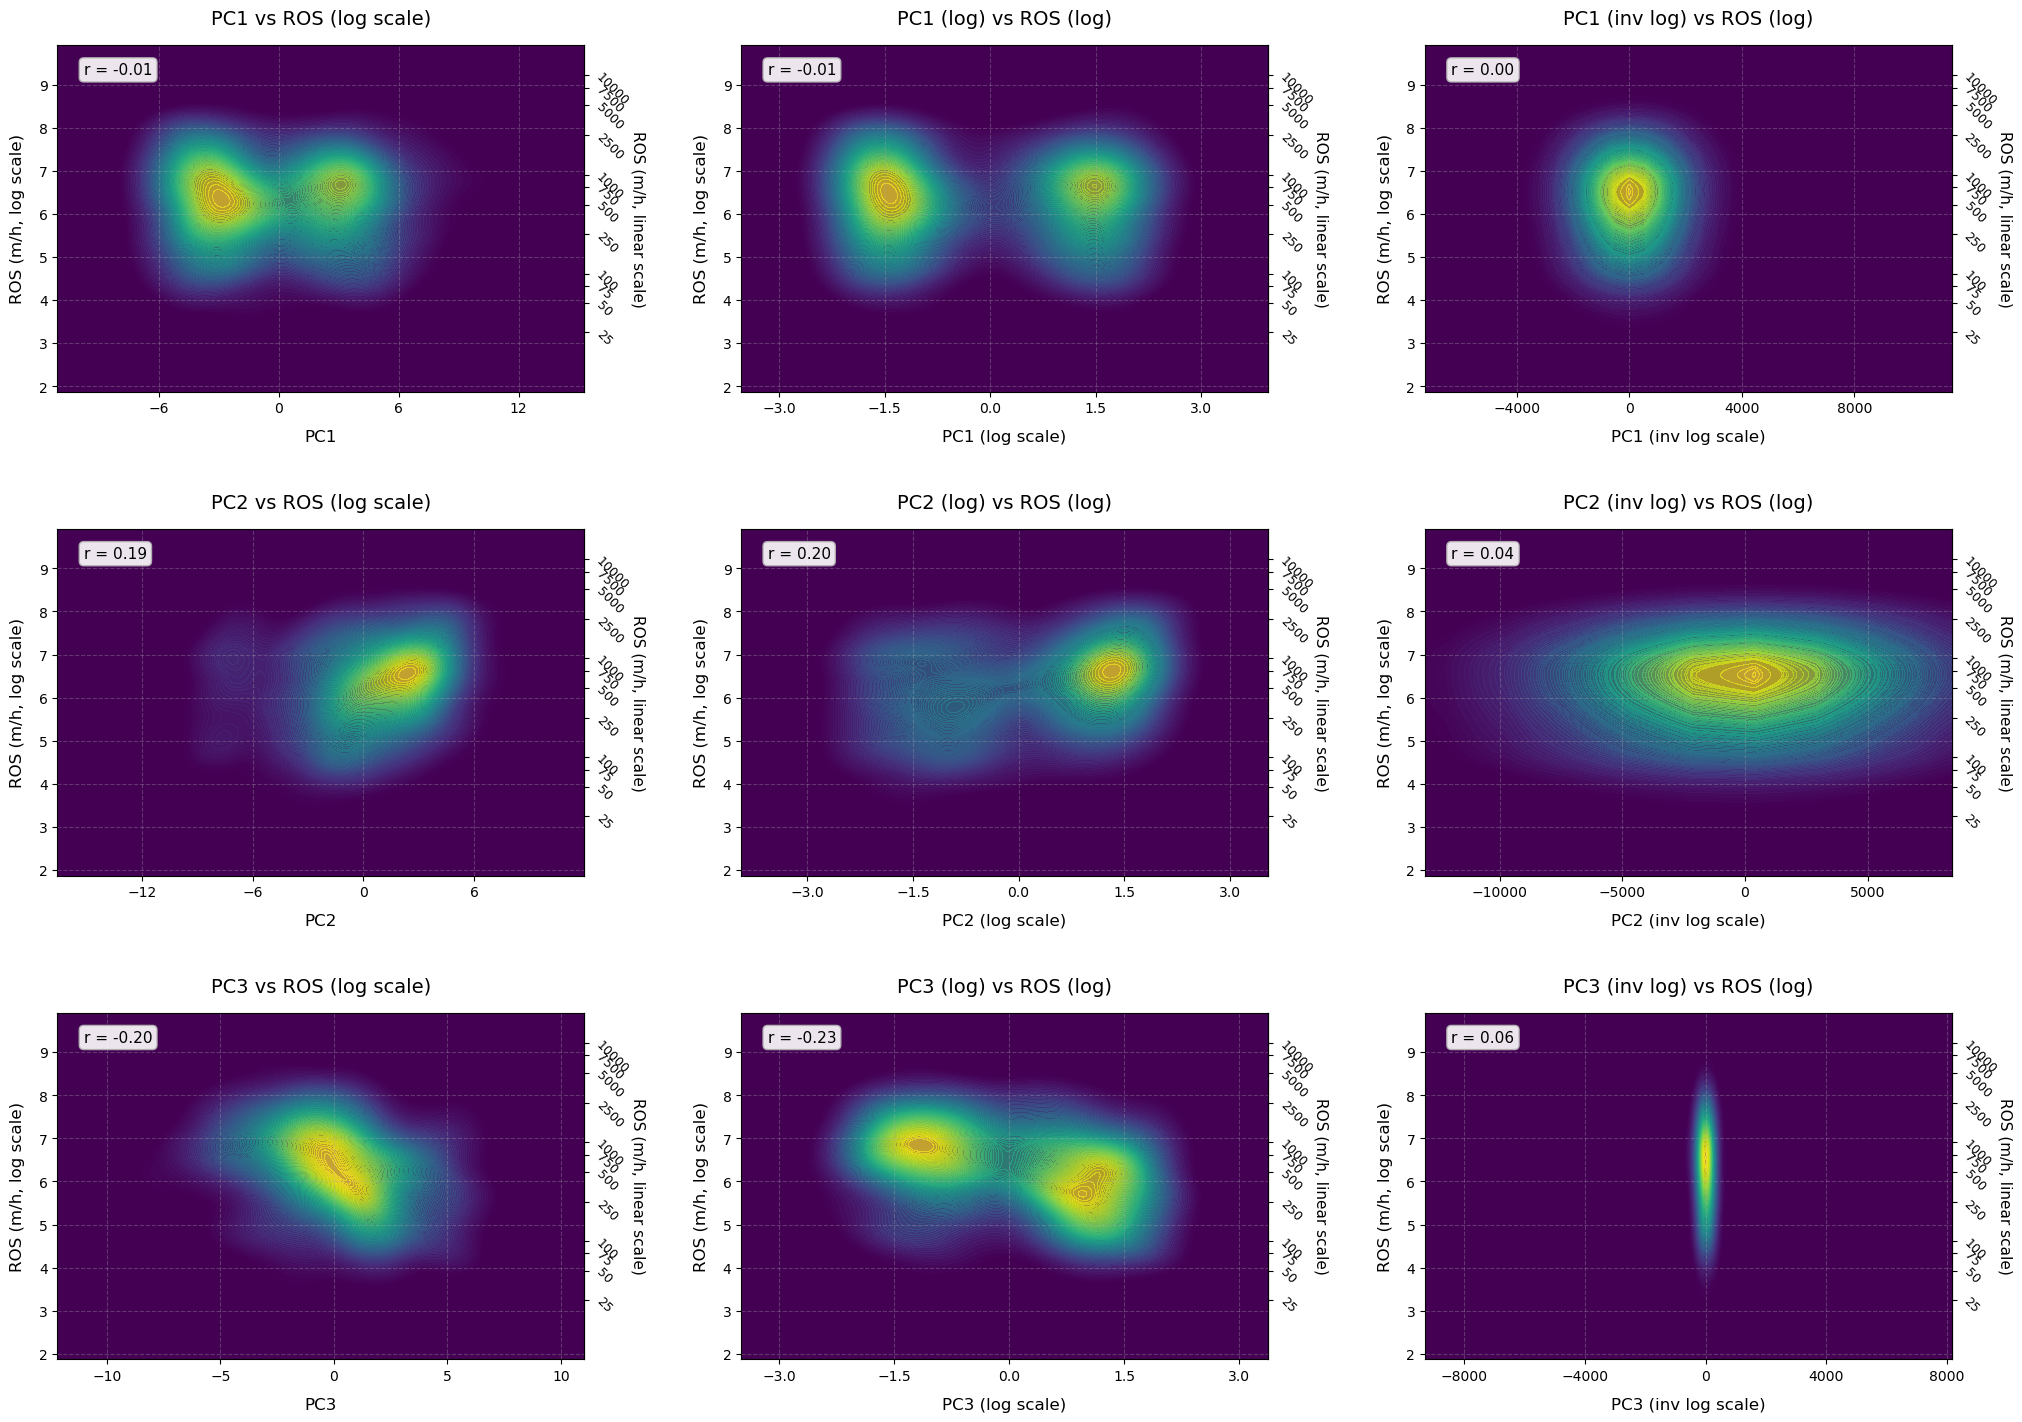

In [8]:
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(21, 5 * n_components))  # agora 3 colunas, largura proporcional

# Ticks do eixo secundário direito (ROS linear)
ticks_sec = list(range(0, 101, 25)) + list(range(0, 1001, 250)) + list(range(0, 10001, 2500))
bg_color = cm.viridis(0)  # valor entre 0 e 1

for i in range(n_components):
    pc = f'PC{i+1}'
    pc_vals = gdf[pc]
    signed_log_pc = np.sign(pc_vals) * np.log1p(np.abs(pc_vals))
    ln_ros = gdf['ln_ros_p1']

    corr_pc = np.corrcoef(pc_vals, ln_ros)[0, 1]
    corr_signed = np.corrcoef(signed_log_pc, ln_ros)[0, 1]

    stats_text_pc = f"r = {corr_pc:.2f}"
    stats_text_signed = f"r = {corr_signed:.2f}"

    # -------- KDE PC original --------
    ax1 = plt.subplot(n_components, 3, 3*i + 1)
    sns.kdeplot(
        x=pc_vals,
        y=ln_ros,
        fill=True,
        cmap="viridis",
        thresh=0.05,
        levels=100,
        alpha=0.7,
        ax=ax1
    )
    ax1.set_title(f"PC{i+1} vs ROS (log scale)", fontsize=14, pad=15)
    ax1.set_xlabel(f"PC{i+1}", fontsize=12, labelpad=10)
    ax1.set_ylabel("ROS (m/h, log scale)", fontsize=12, labelpad=10)
    ax1.set_facecolor(bg_color)
    ax1.text(0.05, 0.95, stats_text_pc, transform=ax1.transAxes, va="top",
             fontsize=11, bbox=dict(boxstyle="round", facecolor="white", edgecolor="0.7", alpha=0.9))
    ax1.grid(True, linestyle="--", alpha=0.3)
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax1_sec = ax1.secondary_yaxis('right', functions=(np.expm1, np.log1p))
    ax1_sec.set_ylabel("ROS (m/h, linear scale)", fontsize=11, labelpad=10, rotation=270)
    ax1_sec.set_yticks(ticks_sec)
    plt.setp(ax1_sec.get_yticklabels(), rotation=315, ha='left', fontsize=9)

    # -------- KDE PC signed log --------
    ax2 = plt.subplot(n_components, 3, 3*i + 2)
    sns.kdeplot(
        x=signed_log_pc,
        y=ln_ros,
        fill=True,
        cmap="viridis",
        thresh=0.05,
        levels=100,
        alpha=0.7,
        ax=ax2
    )
    ax2.set_title(f"PC{i+1} (log) vs ROS (log)", fontsize=14, pad=15)
    ax2.set_xlabel(f"PC{i+1} (log scale)", fontsize=12, labelpad=10)
    ax2.set_ylabel("ROS (m/h, log scale)", fontsize=12, labelpad=10)
    ax2.set_facecolor(bg_color)
    ax2.text(0.05, 0.95, stats_text_signed, transform=ax2.transAxes, va="top",
             fontsize=11, bbox=dict(boxstyle="round", facecolor="white", edgecolor="0.7", alpha=0.9))
    ax2.grid(True, linestyle="--", alpha=0.3)
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=5))
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax2_sec = ax2.secondary_yaxis('right', functions=(np.expm1, np.log1p))
    ax2_sec.set_ylabel("ROS (m/h, linear scale)", fontsize=11, labelpad=10, rotation=270)
    ax2_sec.set_yticks(ticks_sec)
    plt.setp(ax2_sec.get_yticklabels(), rotation=315, ha='left', fontsize=9)

    # -------- KDE PC inverse signed log --------
    inverse_signed_log_pc = np.sign(pc_vals) * (np.expm1(np.abs(pc_vals)))
    corr_inverse = np.corrcoef(inverse_signed_log_pc, ln_ros)[0, 1]
    stats_text_inverse = f"r = {corr_inverse:.2f}"

    ax3 = plt.subplot(n_components, 3, 3*i + 3)
    sns.kdeplot(
        x=inverse_signed_log_pc,
        y=ln_ros,
        fill=True,
        cmap="viridis",
        thresh=0.05,
        levels=100,
        alpha=0.7,
        ax=ax3
    )
    ax3.set_title(f"PC{i+1} (inv log) vs ROS (log)", fontsize=14, pad=15)
    ax3.set_xlabel(f"PC{i+1} (inv log scale)", fontsize=12, labelpad=10)
    ax3.set_ylabel("ROS (m/h, log scale)", fontsize=12, labelpad=10)
    ax3.set_facecolor(bg_color)
    ax3.text(0.05, 0.95, stats_text_inverse, transform=ax3.transAxes, va="top",
             fontsize=11, bbox=dict(boxstyle="round", facecolor="white", edgecolor="0.7", alpha=0.9))
    ax3.grid(True, linestyle="--", alpha=0.3)
    ax3.xaxis.set_major_locator(MaxNLocator(nbins=5))
    ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax3_sec = ax3.secondary_yaxis('right', functions=(np.expm1, np.log1p))
    ax3_sec.set_ylabel("ROS (m/h, linear scale)", fontsize=11, labelpad=10, rotation=270)
    ax3_sec.set_yticks(ticks_sec)
    ax3.set_xlim(-1000* np.log(np.abs(inverse_signed_log_pc.min())), 1000 * np.log(inverse_signed_log_pc.max()))
    plt.setp(ax3_sec.get_yticklabels(), rotation=315, ha='left', fontsize=9)

plt.tight_layout(pad=3.5)
plt.show()
